In [ ]:
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss, log_loss
)
import pandas as pd

In [ ]:
train_df = pd.read_csv("/content/Data2_train.csv")
test_df = pd.read_csv("/content/Data2_test.csv")

# 입력(X), 정답(y) 분리
X_train = train_df.drop(columns=["FIRE_START_DAY"])
y_train = train_df["FIRE_START_DAY"].astype(int)

X_test = test_df.drop(columns=["FIRE_START_DAY"])
y_test = test_df["FIRE_START_DAY"].astype(int)

In [ ]:
import joblib

# 저장된 경로에 맞게 조정
model_path = "/content/rf_final_model.pkl"
rf_final_model = joblib.load(model_path)
print("✅ 모델 로드 완료")

✅ 모델 로드 완료


In [ ]:
y_prob = rf_final_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [ ]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_prob),
    "PR AUC": average_precision_score(y_test, y_prob),
    "Brier Score": brier_score_loss(y_test, y_prob),
    "Log Loss": log_loss(y_test, y_prob)
}

In [ ]:
metrics_df = pd.DataFrame([metrics])
metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC,Brier Score,Log Loss
0,0.76502,0.675958,0.577954,0.623126,0.819453,0.659028,0.160779,0.485913


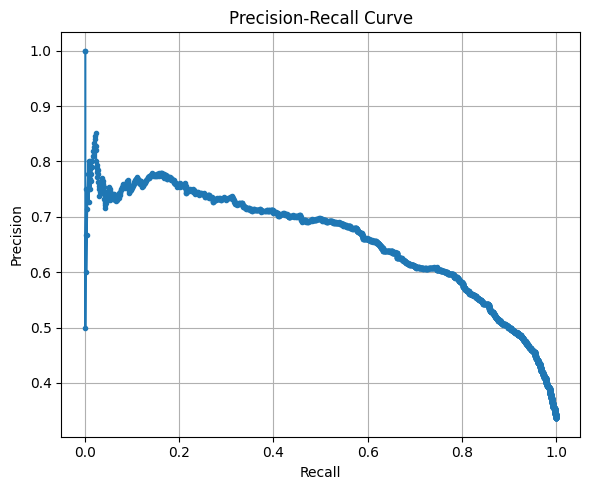

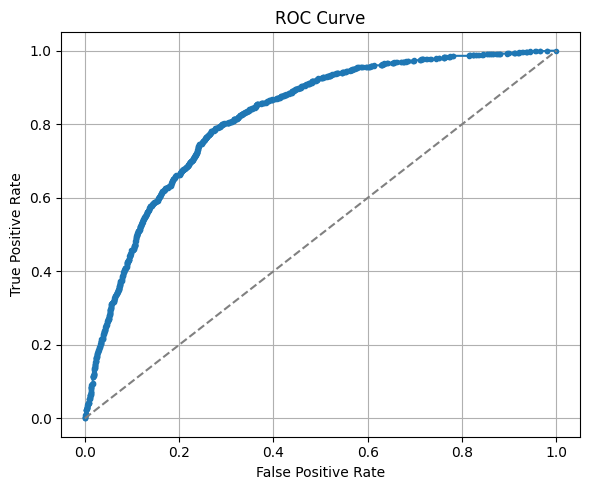

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.tight_layout()
plt.show()